# Analyzing Star Wars survey

Before the launch of 'Star Wars: The Force Awakens' in 2015, the FiveThirtyEight team surveyed 835 respondents using SurveyMonkey about Star Wars. And you could find the repo __[here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)__

The goal of the project is to check people's attitude towards the "Star Wars" series - Which series is their favorite? Which character do they like? Meanwhile, we are trying to further analyze the data and explore how people's preference of the movie differ based on other variables such as gender, age or location.



Here are some of the columns from our dataset:



- RespondentID - An anonymized ID for the respondent
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?


We will be cleaning and exploring the data.

## Overview of the dataset

In [1]:
import pandas as pd
import numpy as np

star_wars = pd.read_csv(r"/Users/sybilchoo/Downloads/DQ_Guided_Projects/Star_Wars_Survey/star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Since the dataset was originally to be a questionnair, the column names tend to be quite long or unnamed. To make the data more readable, we are going to rename the columns and clean the data inside.

## Data cleaning

#### Change the "Yes/No" strings into "True/False" boolean 

In [2]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [3]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [4]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [5]:
true_false = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(true_false)

#### Rename the "Unnamed" columns to make them more readable

The first questions represent the Star Wars 1, the following Unnamed 4-8 are Series 2-6 accordingly. 

In [6]:
star_wars = star_wars.rename(columns = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4":"seen_2",
    "Unnamed: 5":"seen_3",
    "Unnamed: 6":"seen_4",
    "Unnamed: 7":"seen_5",
    "Unnamed: 8":"seen_6"
})

print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you 

In [17]:
star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

#### Change the column type fom 'object' to 'float'

In [8]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [9]:
star_wars = star_wars.rename(columns = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",
    "Unnamed: 10":"ranking_2",
    "Unnamed: 11":"ranking_3",
    "Unnamed: 12":"ranking_4",
    "Unnamed: 13":"ranking_5",
    "Unnamed: 14":"ranking_6"
})

In [18]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

## Comparing the popularity of Star Wars Season 1 to 6

In the following two graphs, we compared the popularity of Star Wars seasons by its ranking and number of the people that have watched each film.

In [11]:
ranking_mean = star_wars.copy()[star_wars.columns[9:15]].mean()

([<matplotlib.axis.XTick at 0x11daee150>,
 <a list of 6 Text xticklabel objects>)

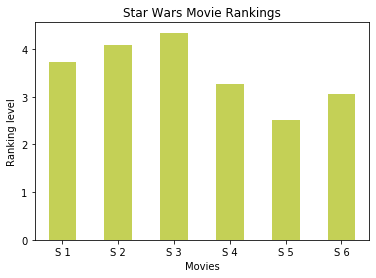

In [52]:
import matplotlib.pyplot as plot
%matplotlib inline

ranking_mean.plot.bar(title="Star Wars Movie Rankings", rot = 0,color="#C4D056")
plt.xlabel('Movies')
plt.ylabel('Ranking level')
plt.xticks((0,1,2,3,4,5),("S 1","S 2","S 3","S 4","S 5","S 6"))

([<matplotlib.axis.XTick at 0x11dba27d0>,
 <a list of 6 Text xticklabel objects>)

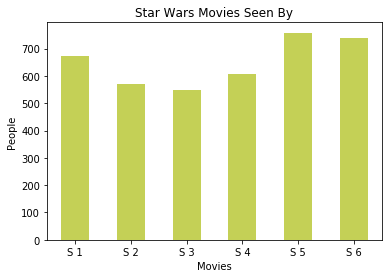

In [54]:
seen_sum = star_wars.copy()[star_wars.columns[3:9]].sum()

seen_sum.plot.bar(title = "Star Wars Movies Seen By",rot = 0,color="#C4D056")
plt.xlabel('Movies')
plt.ylabel('People')
plt.xticks((0,1,2,3,4,5),("S 1","S 2","S 3","S 4","S 5","S 6"))

## Comparing the popularity of Star Wars series among female and males

First, we are going to split the dataset into two different sets based on the gender.

In [56]:
males = star_wars[star_wars["Gender"] == "Male"]

females = star_wars[star_wars["Gender"] == "Female"]

In [15]:
ranking_mean_male = males[males.columns[9:15]].mean()
print(ranking_mean_male)

ranking_mean_female = females.copy()[females.columns[9:15]].mean()
print(ranking_mean_female)

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64
ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64


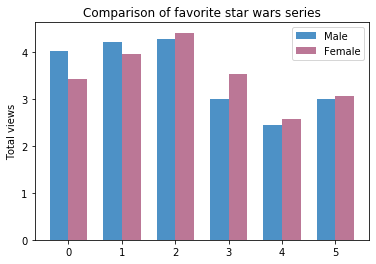

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

labels = ['S1', 'S2', 'S3', 'S4', 'S5','S6']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ranking_mean_male, width,label='Male', color = "#4D91C6")
rects2 = ax.bar(x + width/2, ranking_mean_female, width, label='Female', color = "#BB7796")

ax.set_ylabel('Total views')
ax.set_title('Comparison of favorite star wars series')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

We could see that:
- the first few seasons tend to be more popular among males, while the situation reversed for the latter three series.
- First three series are generally more popular among both males and females.